#**Business** **Problem**
1. Perform descriptive analytics to create a customer profile for each AeroFit 
treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency 
tables and compute all conditional and marginal probabilities along with 
their insights/impact on the business.


# **1: Defining Problem Statement and Analysing basic metrics**.
Observations on shape of data, data types of all the attributes, 
conversion of categorical attributes to 'category' (If required), 
statistical summary

In [60]:
# downloading data to working directory
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2023-03-09 05:40:58--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.40.103, 18.65.40.200, 18.65.40.33, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.40.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.1’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-03-09 05:40:58 (2.77 GB/s) - ‘aerofit_treadmill.csv?1639992749.1’ saved [7279/7279]



In [61]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import binom
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF  # empirical CDF\n",
from scipy.stats import norm,poisson,expon ## norm --> 'Normal' or \"Gaussian' "

In [62]:
# assigning data to object
df=pd.read_csv("/content/aerofit_treadmill.csv?1639992749")

In [63]:
#Exploring first five rows of data set 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [64]:
#Exploring last five rows of data set 
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [65]:
# Length of dataset
len(df)

180

In [66]:
# Checking dataset shape
df.shape

(180, 9)

In [67]:
# Checking dataset datatypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [68]:
# information about the data 
# column names, datatypes, non-null values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#**2: Non-Graphical Analysis: Value counts and unique attributes.**
##checking the value count,unique and nunique for each columns

In [69]:
# Checking number of nunique values in our dataset
for i in df.columns:
  print(i,":",df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [70]:
# Checking number of unique values in our dataset
for i in df.columns:
  print(i,":",df[i].unique())

Product : ['KP281' 'KP481' 'KP781']
Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender : ['Male' 'Female']
Education : [14 15 12 13 16 18 20 21]
MaritalStatus : ['Single' 'Partnered']
Usage : [3 2 4 5 6 7]
Fitness : [4 3 2 1 5]
Income : [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles : [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [71]:
# checking value counts
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [72]:
# checking value counts
df["Age"].value_counts()
  

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [73]:
# checking value counts
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [74]:
# checking value counts
df["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [75]:
# checking value counts
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [76]:
# checking value counts
df["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [77]:
# checking value counts
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [78]:
# checking value counts
df["Income"].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [79]:
# checking value counts
df["Miles"].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

### Statistical summary

In [80]:
# statistical summary
df.describe(include="int")

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [81]:
# statistical summary
df.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**Observations:**

1. It has been observed that the dataset having 9 columns and 180 rows.In which customers age is varies from 18 to 50 years, education is varies from 12 to 21 years, Usage frequency is varies from 2 to 7 days per week, Miles per week is between 21 and 360 and customers Income is varies in between 29k to 105k. 
2. As the dataset not having any null values and product KP281 is the most sold unit of aerofit.Most of the users are 18+ in age and 50% are below 26 and aerofit's most of the users are married couples. It can also infered from data, the male users are more than female users.



#**3: Visual Analysis - Univariate & Bivariate.**
1. For continuous variable(s): Distplot, countplot, histogram for 
univariate analysis.
2. For categorical variable(s): Boxplot.
3. For correlation: Heatmaps, Pairplots.


##Univariate Analysis

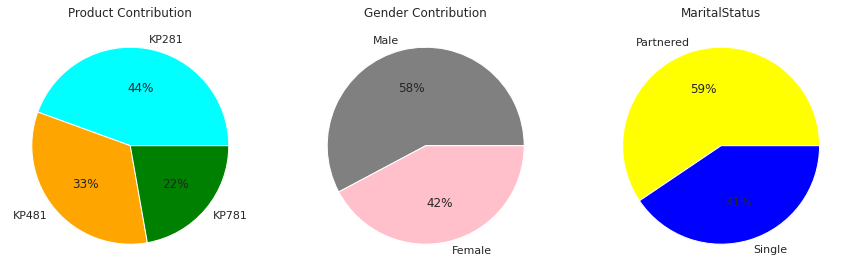

In [82]:
# Analysis through pie-chart
fig = plt.figure(figsize=(15,5))

f1=plt.subplot(1, 3, 1)
f1.set_title('Product Contribution')
data = df["Product"].value_counts()
labels = ['KP281','KP481','KP781']
colors=['cyan','orange','green']
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

f1=plt.subplot(1, 3, 2)
f1.set_title('Gender Contribution')
data = df["Gender"].value_counts()
labels=df['Gender'].value_counts().index
colors=['Grey','Pink']
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

f1=plt.subplot(1, 3, 3)
f1.set_title('MaritalStatus')
data = df["MaritalStatus"].value_counts()
labels=df['MaritalStatus'].value_counts().index
colors=['yellow','blue']
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

**Observations** :

1. Majority of users are having product "KP281" followed by "KP481" and then "KP781".
2. Out of the total, 58% of users are male.
3. Majority of the users are partnered (married).



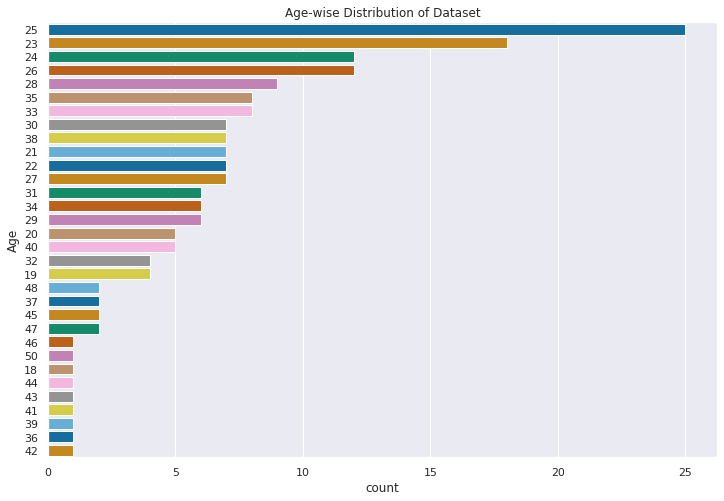

In [83]:
# Analysis through countplot
plt.figure(figsize=(12,8))
plt.title('Age-wise Distribution of Dataset', fontsize=12)
sns.set(style="darkgrid")
ax = sns.countplot(y="Age", data=df, palette="colorblind", order=df['Age'].value_counts().index[0:35])
plt.show()

**Observations** :Age of 25 years user having maximum count and most of the customers are 18+ years. 

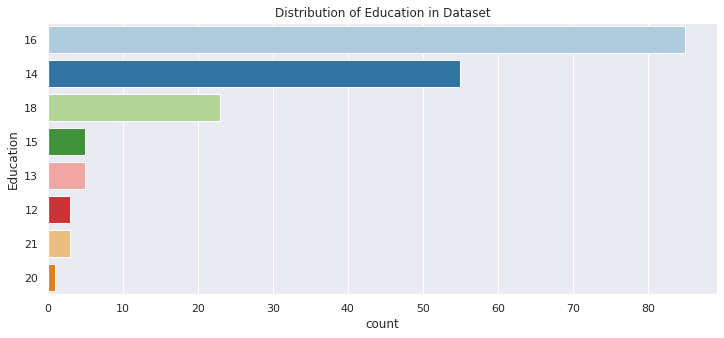

In [84]:
# Analysis through countplot
plt.figure(figsize=(12,5))
plt.title('Distribution of Education in Dataset', fontsize=12)
sns.set(style="whitegrid")
ax = sns.countplot(y="Education", data=df, palette="Paired", order=df["Education"].value_counts().index[0:10])
plt.show()

**Observations** :Most of the customers Education years are in between 16 to 18.

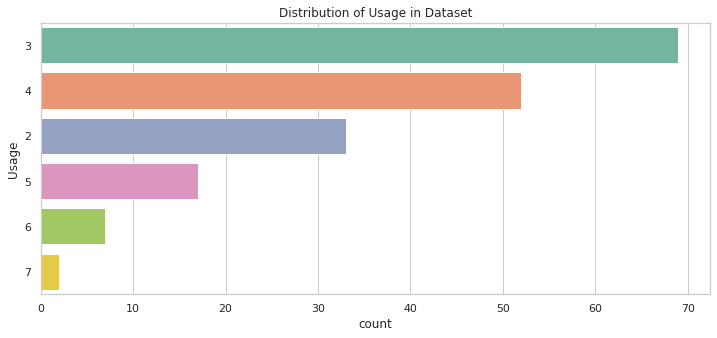

In [85]:
# Analysis through countplot
plt.figure(figsize=(12,5))
plt.title('Distribution of Usage in Dataset', fontsize=12)
sns.set(style="whitegrid")
ax = sns.countplot(y="Usage", data=df, palette="Set2", order=df["Usage"].value_counts().index[0:10])
plt.show()

**Observations**:
Most people are using the product around 3-4 times per week.


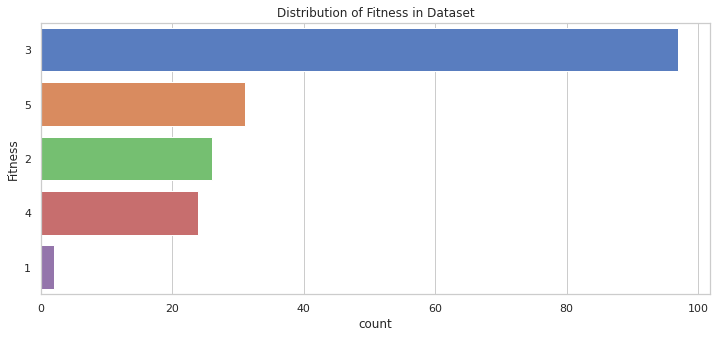

In [86]:
# Analysis through countplot
plt.figure(figsize=(12,5))
plt.title('Distribution of Fitness in Dataset', fontsize=12)
sns.set(style="darkgrid")
ax = sns.countplot(y="Fitness", data=df, palette="muted", order=df["Fitness"].value_counts().index[0:10])
plt.show()

**Observations**:
Medium Active people have rated themself on 3.

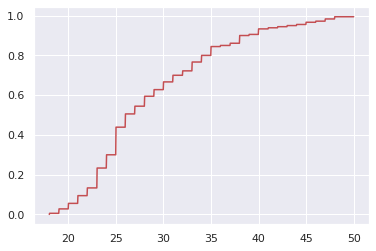

In [87]:
# Empirical Cumulative Distribution Function of age
df_age=df["Age"]
min_age=df["Age"].min()
max_age=df["Age"].max()
x_values=np.linspace(min_age,max_age,1000)
y_values=[]
for x in x_values:
  num_people_younger_than_x=df_age[df_age<x]
  frac_people_younger_than_x=len(num_people_younger_than_x)/len(df_age)
  y_values.append(frac_people_younger_than_x)
plt.plot(x_values,y_values,c="r")
plt.show()

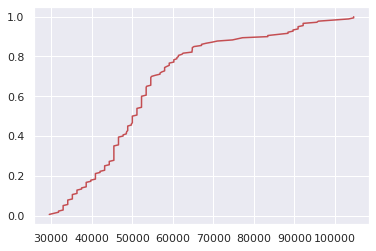

In [88]:
# Empirical Cumulative Distribution Function of Income
df_income=df["Income"]
e_cdf = ECDF(df_income)
plt.plot(e_cdf.x, e_cdf.y, c="r")
plt.show()

**Observations:**
In a given data set age and income data is following almost exponential distrinution.

## **Bi-Variate Analysis**

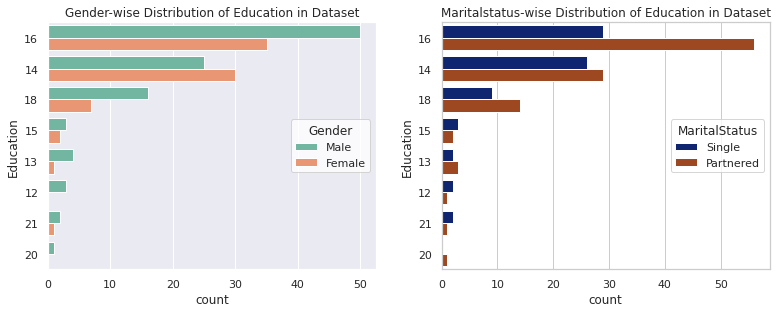

In [89]:
# Bi-Variate Analysis through countplot
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.title('Gender-wise Distribution of Education in Dataset', fontsize=12)
sns.set(style="whitegrid")
ax = sns.countplot(y="Education", data=df, palette="Set2", order=df["Education"].value_counts().index[0:10],hue="Gender")
plt.subplot(2, 3, 2)
plt.title('Maritalstatus-wise Distribution of Education in Dataset', fontsize=12)
sns.set(style="whitegrid")
ax = sns.countplot(y="Education", data=df, palette="dark", order=df["Education"].value_counts().index[0:10],hue="MaritalStatus")
plt.show()

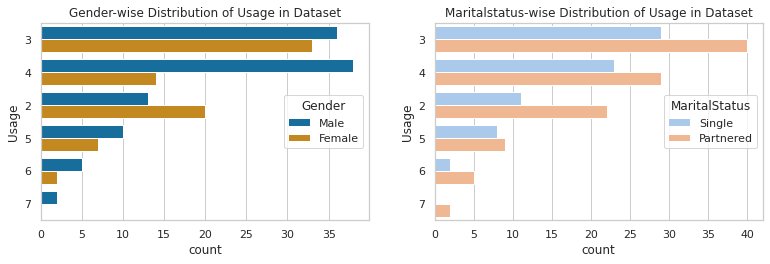

In [90]:
# Bi-Variate Analysis through countplot
plt.figure(figsize=(20,8))
plt.subplot(2, 3, 1)
plt.title('Gender-wise Distribution of Usage in Dataset', fontsize=12)
sns.set(style="whitegrid")
ax = sns.countplot(y="Usage", data=df, palette="colorblind", order=df["Usage"].value_counts().index[0:10],hue="Gender")

plt.subplot(2, 3, 2)
plt.title('Maritalstatus-wise Distribution of Usage in Dataset', fontsize=12)
sns.set(style="whitegrid")
ax = sns.countplot(y="Usage", data=df, palette="pastel", order=df["Usage"].value_counts().index[0:10],hue="MaritalStatus")
plt.show()


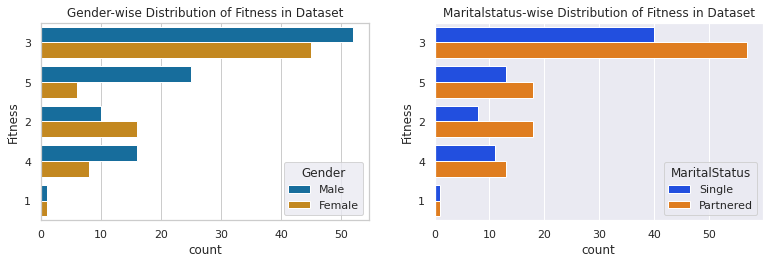

In [91]:
# Bi-Variate Analysis through countplot
plt.figure(figsize=(20,8))
plt.subplot(2, 3, 1)
plt.title('Gender-wise Distribution of Fitness in Dataset', fontsize=12)
sns.set(style="darkgrid")
ax = sns.countplot(y="Fitness", data=df, palette="colorblind", order=df["Fitness"].value_counts().index[0:10],hue="Gender")

plt.subplot(2, 3, 2)
plt.title('Maritalstatus-wise Distribution of Fitness in Dataset', fontsize=12)
sns.set(style="darkgrid")
ax = sns.countplot(y="Fitness", data=df, palette="bright", order=df["Fitness"].value_counts().index[0:10],hue="MaritalStatus")
plt.show()

## **Multi-Variate Analysis**

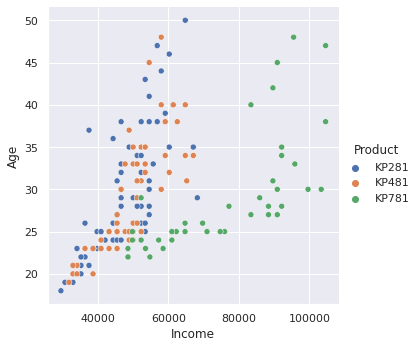

In [92]:
# Multi-Variate Analysis through scattered plot
sns.relplot(data=df, x="Income", y="Age", hue="Product")
plt.show()

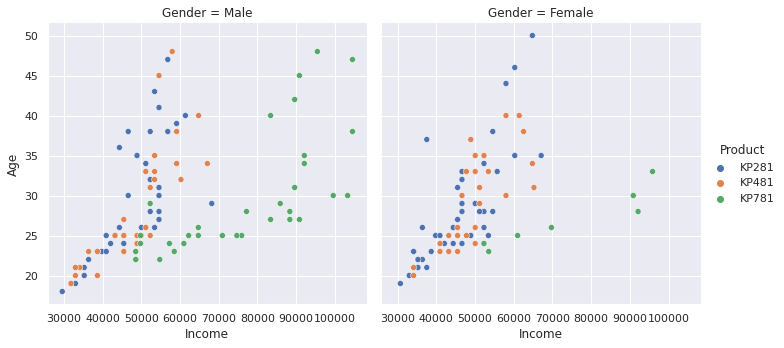

In [93]:
# Multi-Variate Analysis through scattered plot
sns.relplot(data=df, x="Income", y="Age", hue="Product", col="Gender")
plt.show()

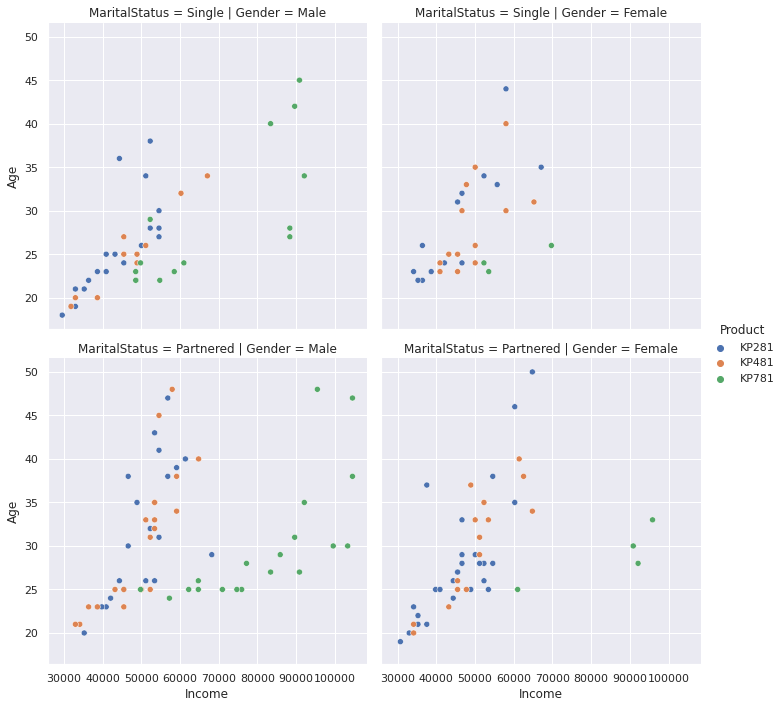

In [94]:
# Multi-Variate Analysis through scattered plot
sns.relplot(data=df, x="Income", y="Age", hue="Product", col="Gender",row="MaritalStatus")
plt.show()

**Observations**
1. As the only 3 females are present above 70000 income.
2. As the age increases the number of women with higher salaries decreases.
3. KP281 & KP481 products are bought by 30k to 70k earning customers.

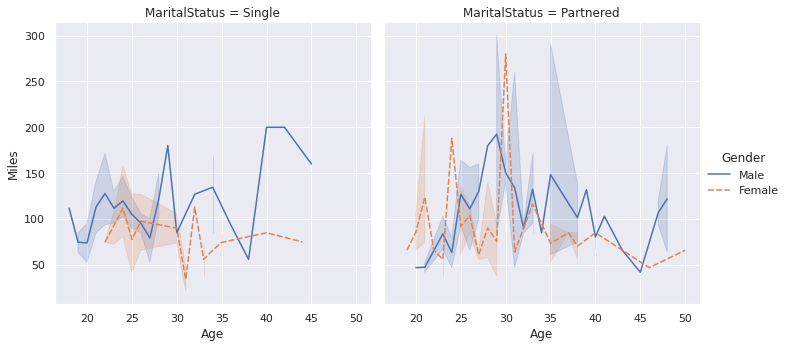

In [95]:
# Multi-Variate Analysis through line plot
sns.relplot(data=df, x="Age", y="Miles", col="MaritalStatus",
    hue="Gender", style="Gender", kind="line")
plt.show()

**Observations**:

1. Unmarried male customers having highest miles arround 200 miles per week at the age of 40 years and for female unmarried user arround 33 years of age with 110 miles per week.
1. Married male customers having highest miles arround 190 miles per week at the age of 28 years and for female unmarried user arround 30 years of age with 280 miles per week.

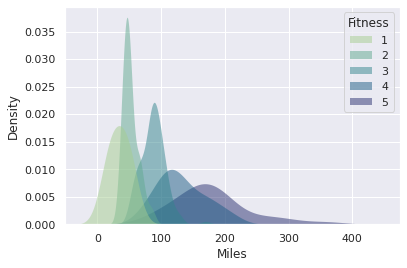

In [96]:
# Bi-Variate Analysis through kde plot
sns.kdeplot( data=df, x="Miles", hue="Fitness",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)
plt.show()

**Observations**:

1. Fitness i.e body shape is directly related to the number of average miles per week user maintained. 
2. The excellent body shape (Fitness rating) with 5 having highest average miles per weeks.

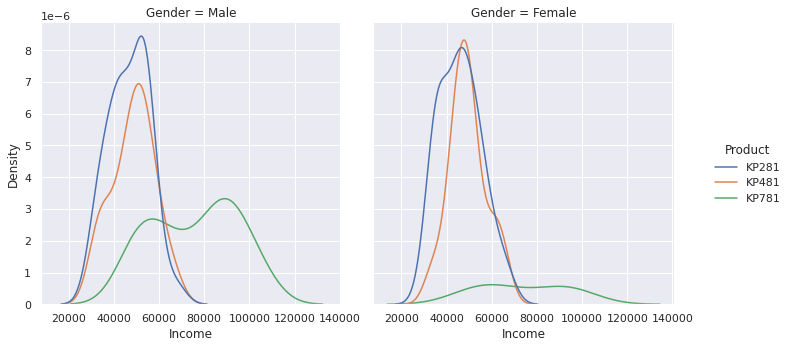

In [97]:
# Multi-Variate Analysis through kde plot
sns.displot(data=df, x="Income", hue="Product", col="Gender", kind="kde")
plt.show()

**Observations**:

1. KP281 & KP481 products are bought by 30k to 70k earning customers.
2. KP781 product bought by customers who earning more than 50k.

## **3: Missing Value & Outlier Detection**

In [98]:
#count of null values in each column
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

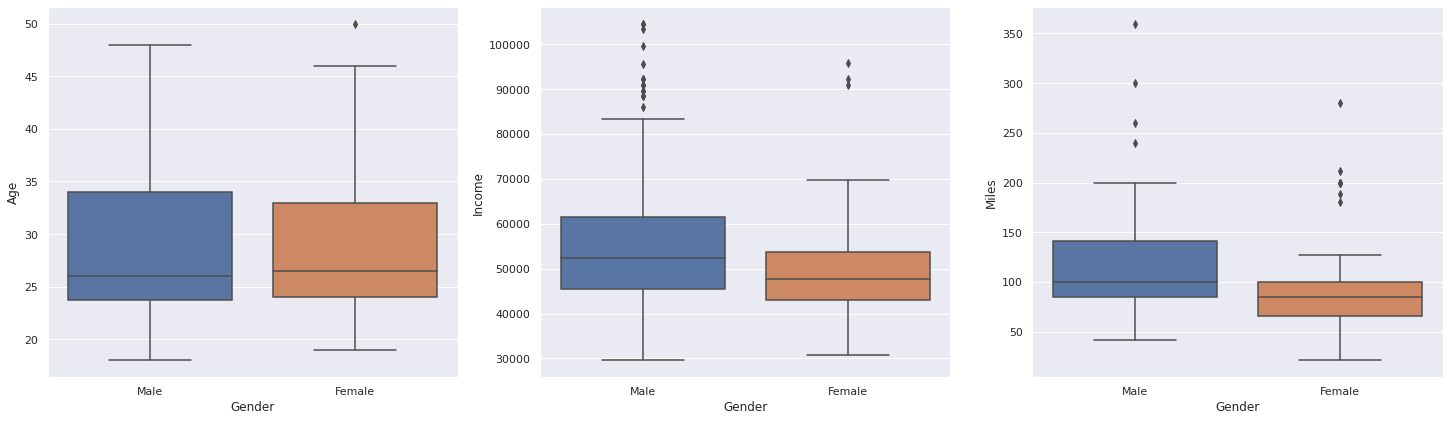

In [99]:
fig = plt.figure(figsize=(25,15))
plt.subplot(2, 3, 1)
sns.boxplot(data = df[['Age','Gender']],x = 'Gender',y = 'Age')
plt.subplot(2, 3, 2)
sns.boxplot(data = df[['Income','Gender']],x = 'Gender',y = 'Income')
plt.subplot(2, 3, 3)
sns.boxplot(data = df[['Miles','Gender']],x = 'Gender',y = 'Miles')
plt.show()

**observations**:Male users having more outliers in income then female users.


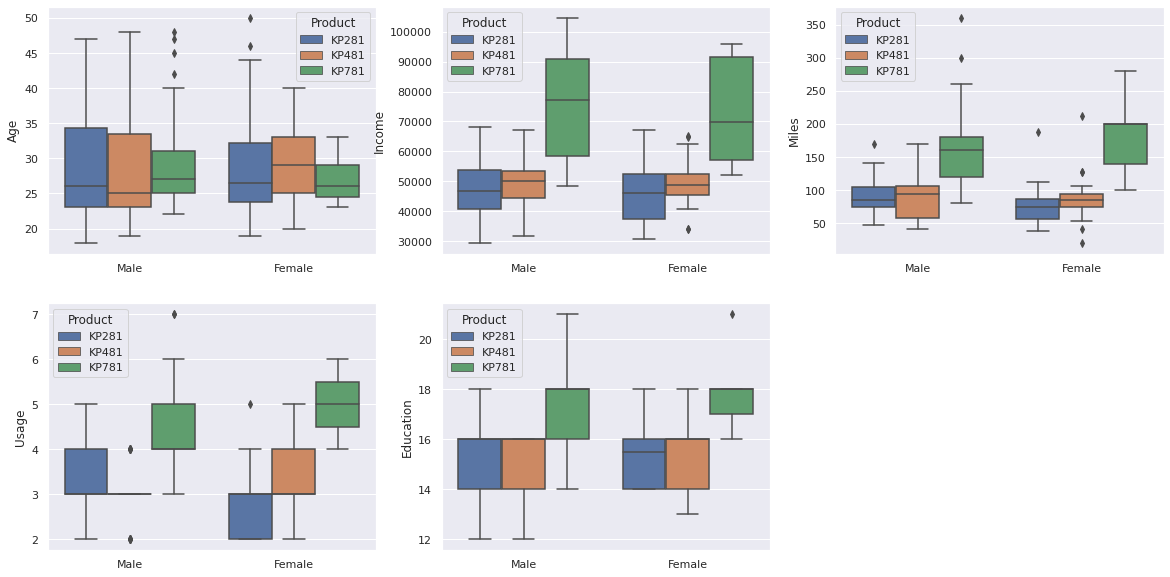

In [100]:
fig=plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=df, x="Gender", y="Age", hue="Product")
plt.ylabel("Age",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,2)
sns.boxplot(data=df, x="Gender", y="Income", hue="Product")
plt.ylabel("Income",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,3)
sns.boxplot(data=df, x="Gender", y="Miles", hue="Product")
plt.ylabel("Miles",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,4)
sns.boxplot(data=df, x="Gender", y="Usage", hue="Product")
plt.ylabel("Usage",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,5)
sns.boxplot(data=df, x="Gender", y="Education", hue="Product")
plt.ylabel("Education",fontsize=12)
plt.xlabel("",fontsize=12)
plt.show()

**Observations**:
1. Users with higher salary prefer the most expensive tredmill (KP781).
2. Users who bought KP781 are regularly using the machine and maintaining average high miles/week.
3. User with more years in education are inclined towards the most premium machine
4. Female users are doing more weekly Usage of KP781 and KP481 but KP281 is mostly used by male users.


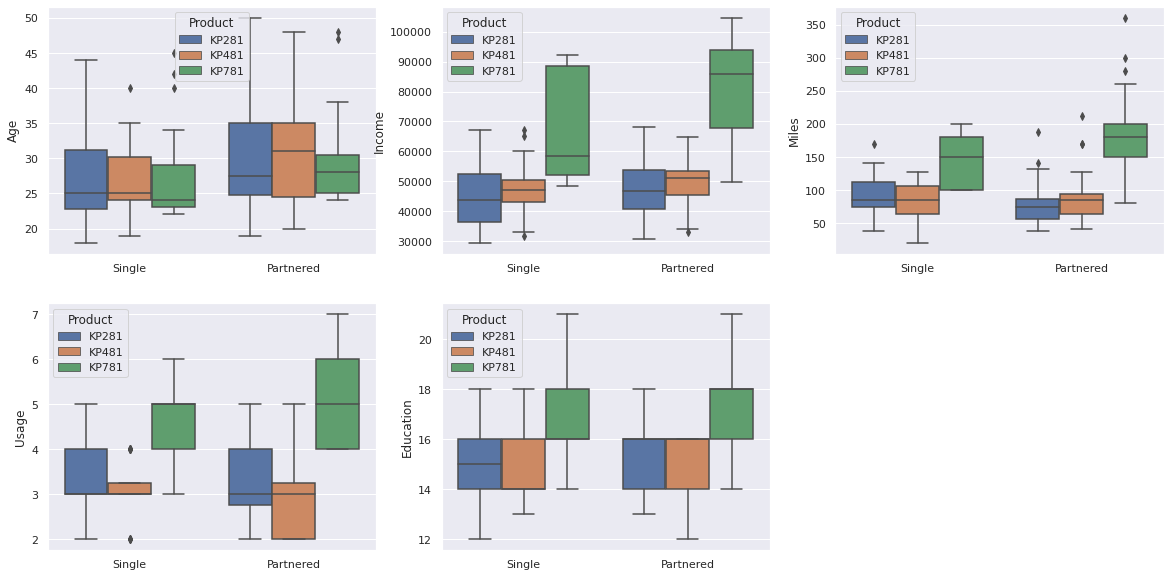

In [101]:
fig=plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=df, x="MaritalStatus", y="Age", hue="Product")
plt.ylabel("Age",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,2)
sns.boxplot(data=df, x="MaritalStatus", y="Income", hue="Product")
plt.ylabel("Income",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,3)
sns.boxplot(data=df, x="MaritalStatus", y="Miles", hue="Product")
plt.ylabel("Miles",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,4)
sns.boxplot(data=df, x="MaritalStatus", y="Usage", hue="Product")
plt.ylabel("Usage",fontsize=12)
plt.xlabel("",fontsize=12)

plt.subplot(2,3,5)
sns.boxplot(data=df, x="MaritalStatus", y="Education", hue="Product")
plt.ylabel("Education",fontsize=12)
plt.xlabel("",fontsize=12)
plt.show()

**observations**:
Partnered users are doing more excersise on KP781 and Single  are doing more on KP481 & KP281

**Observations**:


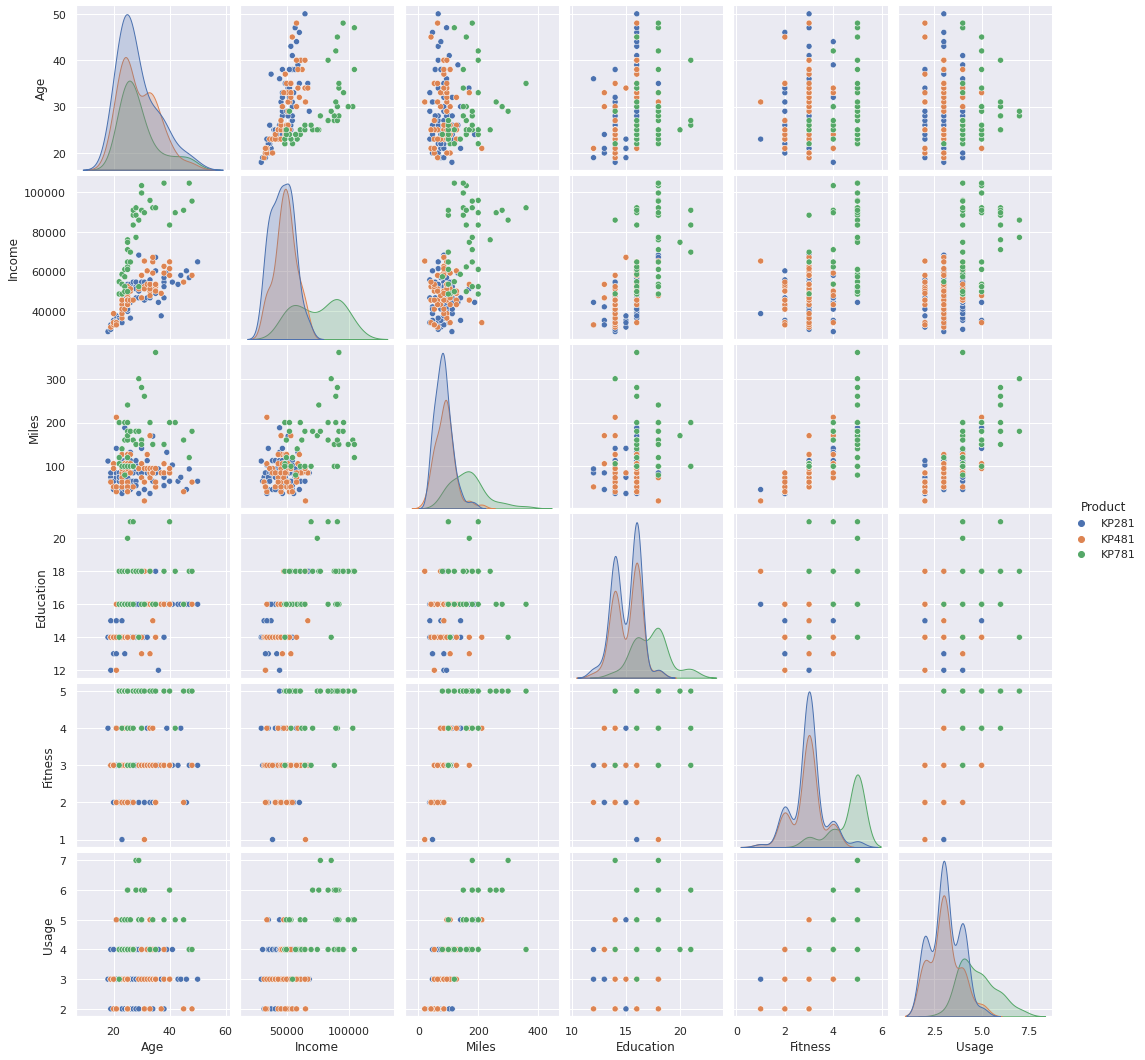

In [102]:
sns.pairplot(data=df[['Age','Income','Miles','Education','Fitness','Usage','Product']], hue='Product')
plt.show()

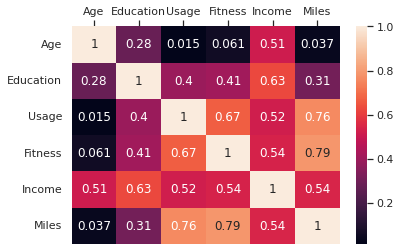

In [103]:
d_f=sns.heatmap(df[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True)
d_f.set(xlabel="", ylabel="")
d_f.xaxis.tick_top()

**Observations**:
1. The correlation coefficient for fitness score & miles covered per week is 0.79 
2.The correlation coefficient for fitness score & usage per week is 0.67
3.The correlation coefficient for miles covered per week & usage per week is 0.76.



## Categorization 

In [104]:
# categorization of customers as per their usages
bins=[0,2,5,7]
labels=["Low","Medium","High"]
df["Active"]=pd.cut(x=df["Usage"],bins=bins,labels=labels,include_lowest=False)
df["Active"].value_counts()

Medium    138
Low        33
High        9
Name: Active, dtype: int64

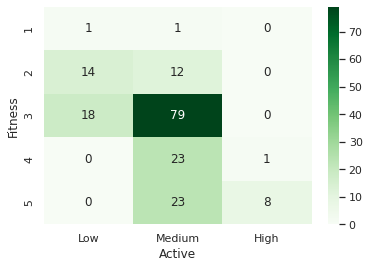

In [105]:
cp_5=pd.crosstab(df["Fitness"],df["Active"])
sns.heatmap(cp_5,cmap="Greens",annot=True)
plt.show()

**Observations**:
1. Highly active people have rated themself on 5.
2. Average Active people have rated themself on 3.
3. Least Active people have rated themself 3 or below 3.


In [106]:
# defining category based on the income in three segment.
bins=[25000, 44058.75, 58668, 104581]
labels=["Low","Middle","High"]
df["Income Segment"]=pd.cut(x=df["Income"], bins=bins, labels=labels, include_lowest=False)
df["Income Segment"].value_counts()

Middle    90
Low       45
High      45
Name: Income Segment, dtype: int64

# **Probability Analysis**

## Marginal Probabilities

In [107]:
Prod=df["Product"].value_counts(normalize=True).round(2)
print("P(KP281):",Prod["KP281"],'\n'"P(KP481):",Prod["KP481"],'\n'"P(KP781):",Prod["KP781"])

P(KP281): 0.44 
P(KP481): 0.33 
P(KP781): 0.22


In [108]:
Gen=df["Gender"].value_counts(normalize=True).round(2)
print("P(Male):",Gen["Male"],'\n'"P(Female):",Gen["Female"])

P(Male): 0.58 
P(Female): 0.42


In [109]:
Mar=df["MaritalStatus"].value_counts(normalize=True).round(2)
print("P(Single):",Mar["Single"],'\n'"P(Partnered):",Mar["Partnered"])

P(Single): 0.41 
P(Partnered): 0.59


In [110]:
df["Usage"].value_counts(normalize=True).round(2)

3    0.38
4    0.29
2    0.18
5    0.09
6    0.04
7    0.01
Name: Usage, dtype: float64

In [111]:
df["Fitness"].value_counts(normalize=True).round(2)

3    0.54
5    0.17
2    0.14
4    0.13
1    0.01
Name: Fitness, dtype: float64

## Conditional Probability

1: Probability of puchasing treadmill
 for the given gender

In [112]:
cp_1=pd.crosstab(df["Product"],columns=df["Gender"])
cp_1

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [113]:
kp281_M=cp_1["Male"]["KP281"].sum()/cp_1["Male"].sum()
kp281_F=cp_1["Female"]["KP281"].sum()/cp_1["Female"].sum()
kp481_M=cp_1["Male"]["KP481"].sum()/cp_1["Male"].sum()
kp481_F=cp_1["Female"]["KP481"].sum()/cp_1["Female"].sum()
kp781_M=cp_1["Male"]["KP781"].sum()/cp_1["Male"].sum()
kp781_F=cp_1["Female"]["KP781"].sum()/cp_1["Female"].sum()
print("P[KP281/Male]",":",kp281_M.round(2))
print("P[KP281/Female]",":",kp281_F.round(2))
print()
print("P[KP481/Male]",":",kp481_M.round(2))
print("P[KP481/Female]",":",kp481_F.round(2))
print()
print("P[KP781/Male]",":",kp781_M.round(2))
print("P[KP781/Female]",":",kp781_F.round(2))

P[KP281/Male] : 0.38
P[KP281/Female] : 0.53

P[KP481/Male] : 0.3
P[KP481/Female] : 0.38

P[KP781/Male] : 0.32
P[KP781/Female] : 0.09


2: Probability of puchasing treadmill
 for the given maritalstatus

In [114]:
cp_2=pd.crosstab(df["Product"],columns=df["MaritalStatus"])
cp_2

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [115]:
kp281_P=cp_2["Partnered"]["KP281"].sum()/cp_2["Partnered"].sum()
kp281_S=cp_2["Single"]["KP281"].sum()/cp_2["Single"].sum()
kp481_P=cp_2["Partnered"]["KP481"].sum()/cp_2["Partnered"].sum()
kp481_S=cp_2["Single"]["KP481"].sum()/cp_2["Single"].sum()
kp781_P=cp_2["Partnered"]["KP781"].sum()/cp_2["Partnered"].sum()
kp781_S=cp_2["Single"]["KP781"].sum()/cp_2["Single"].sum()
print("P[KP281/Partnered]",":",kp281_P.round(2))
print("P[KP281/Single]",":",kp281_S.round(2))
print()
print("P[KP481/Partnered]",":",kp481_P.round(2))
print("P[KP481/Single]",":",kp481_S.round(2))
print()
print("P[KP781/Partnered]",":",kp781_P.round(2))
print("P[KP781/Single]",":",kp781_S.round(2))

P[KP281/Partnered] : 0.45
P[KP281/Single] : 0.44

P[KP481/Partnered] : 0.34
P[KP481/Single] : 0.33

P[KP781/Partnered] : 0.21
P[KP781/Single] : 0.23



3: Probability of puchasing treadmill
 for the given maritalstatus

In [116]:
cp_3=pd.crosstab(df["Product"],columns=df["Income Segment"])
cp_3

Income Segment,Low,Middle,High
Product,,,
KP281,30,43,7
KP481,15,36,9
KP781,0,11,29


In [117]:
kp281_H=cp_3["High"]["KP281"].sum()/cp_3["High"].sum()
kp281_M=cp_3["Middle"]["KP281"].sum()/cp_3["Middle"].sum()
kp281_L=cp_3["Low"]["KP281"].sum()/cp_3["Low"].sum()
kp481_H=cp_3["High"]["KP481"].sum()/cp_3["High"].sum()
kp481_M=cp_3["Middle"]["KP481"].sum()/cp_3["Middle"].sum()
kp481_L=cp_3["Low"]["KP481"].sum()/cp_3["Low"].sum()
kp781_H=cp_3["High"]["KP781"].sum()/cp_3["High"].sum()
kp781_M=cp_3["Middle"]["KP781"].sum()/cp_3["Middle"].sum()
kp781_L=cp_3["Low"]["KP781"].sum()/cp_3["Low"].sum()
print("P[KP281/High]",":",kp281_H.round(2))
print("P[KP281/Middle]",":",kp281_M.round(2))
print("P[KP281/Low]",":",kp281_L.round(2))
print()
print("P[KP481/High]",":",kp481_H.round(2))
print("P[KP481/Middle]",":",kp481_M.round(2))
print("P[KP481/Low]",":",kp481_L.round(2))
print()
print("P[KP781/High]",":",kp781_H.round(2))
print("P[KP781/Middle]",":",kp781_M.round(2))
print("P[KP781/Low]",":",kp781_L.round(2))

P[KP281/High] : 0.16
P[KP281/Middle] : 0.48
P[KP281/Low] : 0.67

P[KP481/High] : 0.2
P[KP481/Middle] : 0.4
P[KP481/Low] : 0.33

P[KP781/High] : 0.64
P[KP781/Middle] : 0.12
P[KP781/Low] : 0.0


# **Customer Profiling** 
### KP781:
1. Product targeted by high income group of users.
2. Mostly perferred by married users.
3. Mostly users having fitness rating more than 3.
4. Miles covered per week are highest.
5. Males are primary buyers of this product.
6. Users for this product having 16+ years of education.
7. Users those are regularly excercised are the target customer.


### KP481:
1. This product belongs to middle segment of price range.
2. Users for this product are having usages frquency of 4 or below 4.
3. Miles covered per week are slightly higher then KP281.
4. This product also mainly adopted by married couples.
5. Users for this product are falling under Middle category of Income.


### KP281:
1. 44% of the total users belongs to this product.
2. Users with lower income and less weekly usage tends to buy this product.
3. Usage below 150 miles per week.
4. Users who educated under 16 years most preferable.
5. Fitness rating mostly under 3.




#**Business Insights**:
1. 44% of users adopted KP281
2. 58% of total users are Male.
3. 60% of the users are married.
4. Number of units sold decrease with increase in the price of the unit.
5. KP781 product is most preferred by Males, it’s almost 6 times compared to Females.
6. Probability of low income group users buying KP781 is 0.00
7. Probability of high income group users buying KP781 is 0.64
8. Probability of low income group users buying KP281 is 0.67
9. Probability of high income group users buying KP281 is 0.16
10. Probability of low income group users buying KP481 is 0.33
11. Probability of high income group users buying KP481 is 0.20
12. Probability of un-married group users buying KP281 is 0.44
13. Probability of married group users buying KP281 is 0.45
14. Probability of un-married group users buying KP781 is 0.23
13. Probability of married group users buying KP781 is 0.21
16. Chances of Male users buying a KP781 is higher then a female users buying KP781.

# **Recommendations**:
1. KP781 is the premium product, so we can promote this product in premium segment.
2. For segment-wise targeting customer we can prefer customer profiles. 
3. As the KP281 and KP481 have almost same user profile, Aerofit should promote KP481 more to users in order to generate more revenue.
4. As KP781 should be presented as best treadmill for long duration and better excersise and users experience.
5. Based on User purchase history ads can be directed to relevent people.
6. Giving some addons with KP481 might attract users to buy it.

